In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import tweepy
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from config import consumer_key, consumer_secret, access_token, access_token_secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [27]:
news_orgs = ['BBC','CBS', 'CNN', 'fox', 'nytimes']

tweet_count = 100

news_sentiment_analysis = pd.DataFrame()

for target_outlet in news_orgs :
    news_media = []
    positive = []
    neutral = []
    negative = []
    compound = []
    create_date = []
    tweets_ago = []
    

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_outlet, count=tweet_count)

    # Loop through all tweets
    i = 0
    for tweet in public_tweets:
        tweet_text = tweet["text"]
        #Sentiments
        positive.append(analyzer.polarity_scores(tweet_text)["pos"])
        neutral.append(analyzer.polarity_scores(tweet_text)["neu"])
        negative.append(analyzer.polarity_scores(tweet_text)["neg"])
        compound.append(analyzer.polarity_scores(tweet_text)["compound"])
        create_date.append(datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")) 
        news_media.append(tweet['user']['screen_name'])
        tweets_ago.append(i)
        i=i-1               
 

    data = pd.DataFrame({"news_media": news_media,
                         "positive": positive,
                         "neutral": neutral,
                         "negative": negative,
                         "compound": compound,
                         "create_date": create_date,
                         "tweets_ago":tweets_ago
                       })
    news_sentiment_analysis = news_sentiment_analysis.append(data)  

news_sentiment_analysis.set_index('news_media', 'create_date')
news_sentiment_analysis.to_csv("news_media_sentiment_analysis.csv")

In [28]:
import datetime
now = datetime.datetime.now()

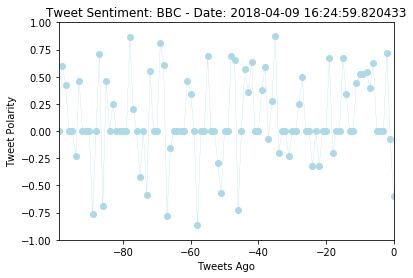

In [29]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='BBC']['tweets_ago']
tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='BBC']['compound']


plt.plot(tweets_ago, tweet_compound, marker="o", linewidth=0.25, color = "lightblue")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])

plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.title(f'Tweet Sentiment: BBC - Date: {now}')
plt.savefig("BBC.png")
plt.show()

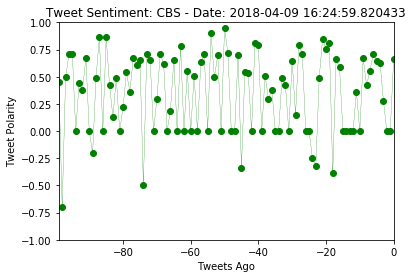

In [30]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CBS']['tweets_ago']
tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CBS']['compound']

plt.plot(tweets_ago, tweet_compound, marker="o", linewidth=0.25, color = "green")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])

plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.title(f'Tweet Sentiment: CBS - Date: {now}')
plt.savefig("CBS.png")
plt.show()

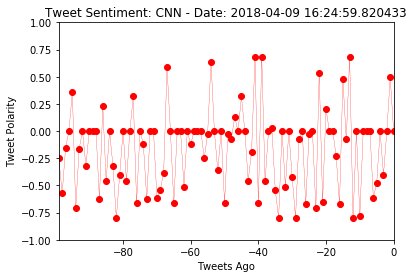

In [31]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CNN']['tweets_ago']
tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CNN']['compound']

plt.plot(tweets_ago, tweet_compound, marker="o", linewidth=0.25, color = "red")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])

plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.title(f'Tweet Sentiment: CNN - Date: {now}')
plt.savefig("CNN.png")
plt.show()

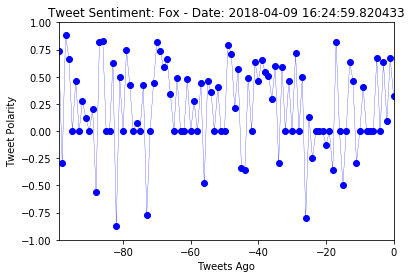

In [32]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='fox']['tweets_ago']
tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='fox']['compound']

plt.plot(tweets_ago, tweet_compound, marker="o", linewidth=0.25, color = "blue")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])

plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.title(f'Tweet Sentiment: Fox - Date: {now}')
plt.savefig("Fox.png")
plt.show()

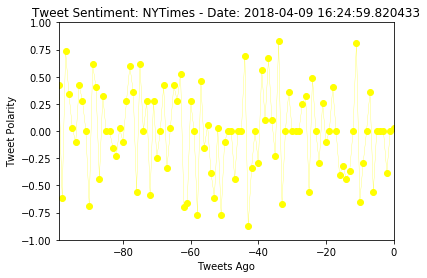

In [33]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='nytimes']['tweets_ago']
tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='nytimes']['compound']

plt.plot(tweets_ago, tweet_compound, marker="o", linewidth=0.25, color = "yellow")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])

plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.title(f'Tweet Sentiment: NYTimes - Date: {now}')
plt.savefig("NYTimes.png")
plt.show()

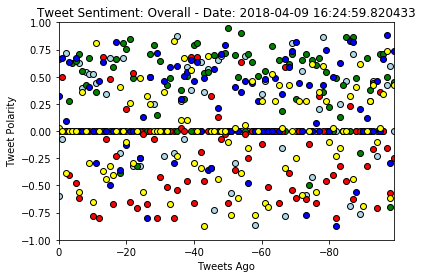

In [34]:
overall_sent = []
for target_outlet in news_orgs:
    tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media==target_outlet]['compound']
    overall_sent.append(np.mean(tweet_compound))

tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='BBC']['tweets_ago']
bbc=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='BBC']['compound']
plt.scatter(tweets_ago, bbc, marker="o", facecolors="lightblue", edgecolors="black")

tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CBS']['tweets_ago']
cbs=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CBS']['compound']
plt.scatter(tweets_ago, cbs, marker="o", facecolors="green", edgecolors="black")

tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CNN']['tweets_ago']
cnn=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CNN']['compound']
plt.scatter(tweets_ago, cnn, marker="o", facecolors="red", edgecolors="black")

tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='fox']['tweets_ago']
fox=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='fox']['compound']
plt.scatter(tweets_ago, fox, marker="o", facecolors="blue", edgecolors="black")

tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='nytimes']['tweets_ago']
nytimes=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='nytimes']['compound']
plt.scatter(tweets_ago, nytimes, marker="o", facecolors="yellow", edgecolors="black")

x_limit = np.min(tweets_ago)
plt.ylim(-1, 1)
plt.xlim(0, x_limit)
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.title(f'Tweet Sentiment: Overall - Date: {now}')
plt.savefig("all_moods_scat.png")
plt.show()

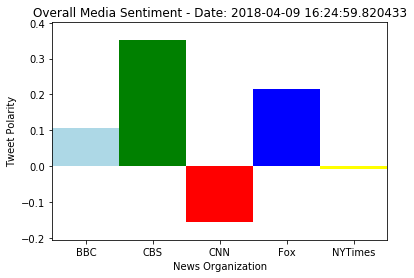

In [35]:
x_axis = [0,1,2,3,4]

plt.bar(0, overall_sent[0], facecolor='lightblue', alpha=1.0, align="center",width=1.0)
plt.bar(1, overall_sent[1], facecolor='green', alpha=1.0, align="center",width=1.0)
plt.bar(2, overall_sent[2], facecolor='red', alpha=1.0, align="center",width=1.0)
plt.bar(3, overall_sent[3], facecolor='blue', alpha=1.0, align="center",width=1.0)
plt.bar(4, overall_sent[4], facecolor='yellow', alpha=1.0, align="center",width=1.0)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["BBC","CBS","CNN", "Fox", "NYTimes"])

plt.xlim(-0.5, 4.5)
plt.ylim(min(overall_sent)-0.05, max(overall_sent)+0.05)

#plt.title("Overall Media Sentiment")
plt.title(f'Overall Media Sentiment - Date: {now}')
plt.xlabel("News Organization")
plt.ylabel("Tweet Polarity")
plt.savefig("all_moods_bar.png")
plt.show()